<a href="https://colab.research.google.com/github/ShohamWeiss/Statistics/blob/master/IBM/IBM_Data_Science_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

startDate = "2013-01-01"
endDate = "2013-01-01"
temperature = [24, 34.38, 34.36, 34.74, 35.26, 35.23, 35.29, 35.64, 36.02, 36.1, 36.98, 37.01 ,36.75, 36.01, 35.66, 34.72, 33.9, 32.62, 31.51, 30.73, 29.5, 26.94, 25.47, 23.84]
N = 5

In [ ]:
import datetime
import numpy as np
def predictTemperature(startDate, endDate, temperature, n):
  start = pd.to_datetime(startDate)
  end = pd.to_datetime(endDate) + datetime.timedelta(days=1) - datetime.timedelta(minutes=60)
  dates = pd.date_range(start, end, freq="60min").tolist()
  print(len(dates), len(temperature))
  df = pd.DataFrame({'Date': dates, 'Temperature': temperature})
  df.Temperature = pd.to_numeric(df.Temperature)
  for i in range(N):
    end = end + datetime.timedelta(minutes=60)
    df = df.append(pd.DataFrame({'Date':[end], 'Temperature': [np.nan]}))
  df = df.set_index('Date')
  df = df.assign(interp = df.Temperature.interpolate(method='spline', order=2))
  print(df)
  return df.tail(24).interp.tolist()
predictTemperature(startDate, endDate, temperature, N)

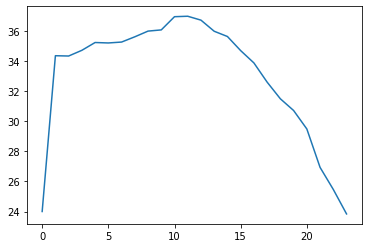

In [2]:
import matplotlib.pyplot as plt
plt.plot(temperature)